# EDA - Loan Prediction Problem

## Table of Contents

1. Problem Statement
2. Importing libraries and the Dataset
3. Quick Data Exploration
	- Variable Descriptions
4. Distribution Analysis
5. Categorical Variable Analysis
  - Credit_History v/s Loan_Status
  - Gender v/s Loan_Status
  - Married v/s Loan_Status
  - Dependants v/s Loan_Status
  - Education v/s Loan_Status
  - Self_Employed v/s Loan_Status
  - Property_Area v/s Loan_Status
6. Data Wrangling for further exploration
	-  Checking missing values in the dataset
	-  Imputing the missing values of other columns
	-  Possible Additonal Info
6. Actionable Insights


## 1. Problem Statement

A Company wants to automate the **loan eligibility process** based on the **customer details** provided while filling the online application form. These details are **Gender**, **Marital Status**, **Education**, **Number of Dependents**, **Income**, **Loan Amount**, **Credit History** and others. To automate this process, they have given a problem to identify the **customers' segments**, those are **eligible for loan amount** so that they can specifically target these customers.

## 2. Importing libraries and the Dataset

This dataset can be downloaded from: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset .

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#To supress all the warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("C:/Users/Rajeev/Downloads/loan-prediction-problem-dataset/LoanPredictionProblem.csv")

## 3. Quick Data Exploration

In [2]:
#Printing first five rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#No. of rows and columns in the dataset
df.shape

(614, 13)

**Variable Descriptions:**

| Variable  | Description  |
| ------------ | ------------ |
| Loan_ID  | Unique Loan ID   |
| Gender  | Male/Female  |
| Married  | Applicant married (Y/N)  |
| Dependants  | No. of Dependants   |
| Education  | Applicant Education (Graduate/ Under Graduate)  |
| Self_Employed  | Self employed (Y/N)  |
| ApplicantIncome  | Applicant income  |
| CoapplicantIncome  | Coapplicant income  |
| LoanAmount  | Loan amount in thousands  |
| Loan_Amount_Term  | Term of loan in months  |
| Credit_History  | Credit history meets guidelines  |
| Property_Area	  | Urban/ Semi Urban/ Rural  |
| Loan_Status  | Loan approved (Y/N)  |

In [4]:
df.describe() #Get the statistics of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Inferences:**
1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. The mean of Credit_History is 0.84. So, 84% applicants have a credit_history.

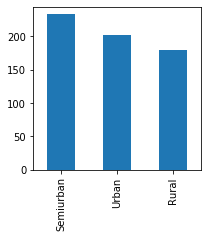

In [5]:
df['Property_Area'].value_counts() #Frequency distribution of Property_Area column
df['Property_Area'].value_counts().plot.bar(figsize = (3 ,3))

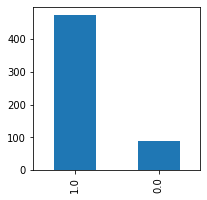

In [6]:
df['Credit_History'].value_counts() #Frequency distribution of Credit_History column
df['Credit_History'].value_counts().plot.bar(figsize = (3 ,3))

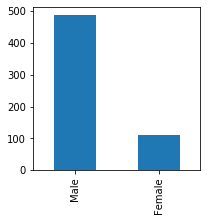

In [7]:
df['Gender'].value_counts() #Frequency distribution of Gender column
df['Gender'].value_counts().plot.bar(figsize = (3 ,3))

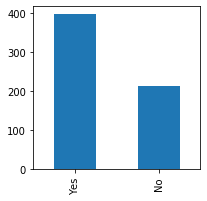

In [8]:
df['Married'].value_counts() #Frequency distribution of Married column
df['Married'].value_counts().plot.bar(figsize = (3 ,3))

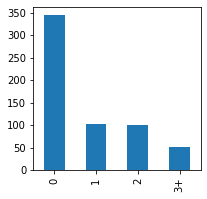

In [9]:
df['Dependents'].value_counts() #Frequency distribution of Dependents column
df['Dependents'].value_counts().plot.bar(figsize = (3 ,3))

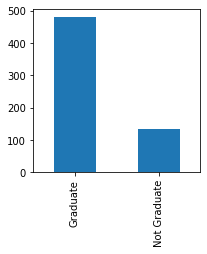

In [10]:
df['Education'].value_counts() #Frequency distribution of Education column
df['Education'].value_counts().plot.bar(figsize = (3 ,3))

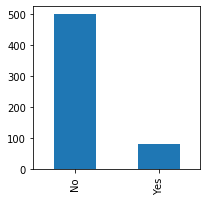

In [11]:
df['Self_Employed'].value_counts() #Frequency distribution of Self_Employed column
df['Self_Employed'].value_counts().plot.bar(figsize = (3 ,3))

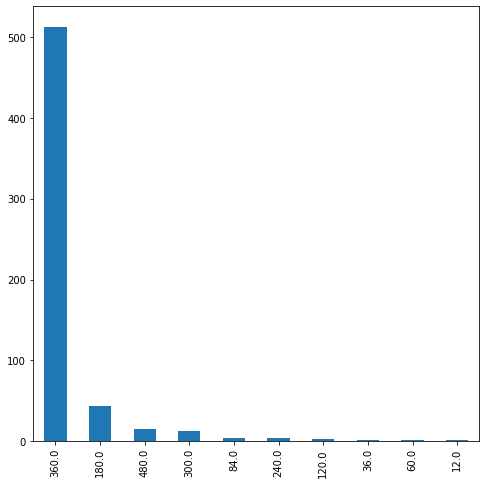

In [12]:
df['Loan_Amount_Term'].value_counts() #Frequency distribution of Loan_Amount_Term column
df['Loan_Amount_Term'].value_counts().plot.bar(figsize = (8 ,8))

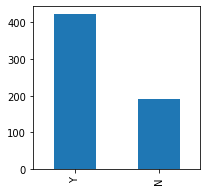

In [13]:
df['Loan_Status'].value_counts() #Frequency distribution of Loan_Status column
df['Loan_Status'].value_counts().plot.bar(figsize = (3 ,3))

## 4. Distribution analysis

The distribution of numeric variables – ApplicantIncome and LoanAmount.

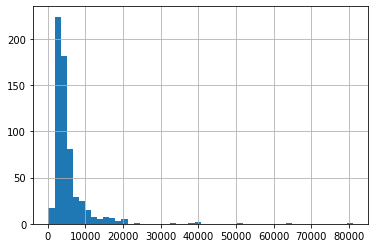

In [14]:
df['ApplicantIncome'].hist(bins=50) #Plotting a histogram

Box plots helps in understanding the distributions. This can be plotted as follows:

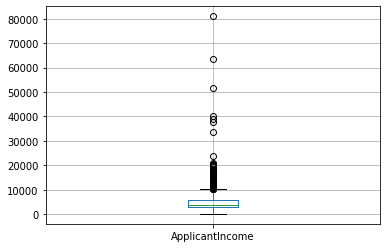

In [15]:
df.boxplot(column = 'ApplicantIncome') #Plotting a boxplot

This shows us the presence of a lot of outliers/extreme values. This can be explained by the income differences in the society. It could also be guided by the fact that we are looking at people with different education levels. Now we segregate them by Education:

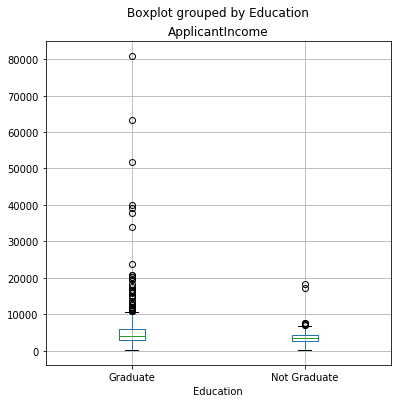

In [16]:
df.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (6,6))

We can observe that there is not much difference between the mean income of graduates and non-graduates. But there are many graduates with very high incomes, which appear to be the outliers. Now, we will look at the histogram and boxplot of LoanAmount.

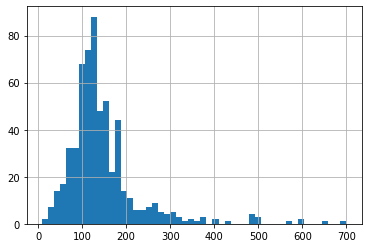

In [17]:
df['LoanAmount'].hist(bins = 50)

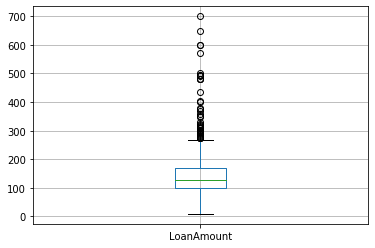

In [18]:
df.boxplot(column = 'LoanAmount')

There are some extreme values here as well. So, both ApplicantIncome and LoanAmount require some amount of data wrangling. LoanAmount has missing and extreme values, while ApplicantIncome has a few extreme values.

## 5. Categorical Variable Analysis

**Credit_History v/s Loan_Status**

Now, we will look at the chances of getting a loan based on credit history. This can be achieved using excel style pivot table and cross-tabulation. Loan status has been coded as 1 for Yes and 0 for No. So the mean represents the probability of getting a loan.

In [19]:
#Pivot Tables
temp1 = df['Credit_History'].value_counts(ascending = True)
temp2 = df.pivot_table(values = 'Loan_Status', index = ['Credit_History'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting a loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting a loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


We will plot this as a bar chart also.

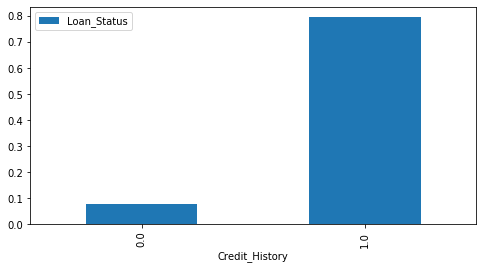

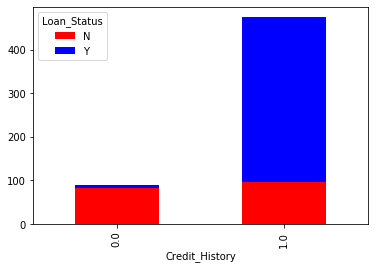

In [20]:
temp2.plot(kind = 'bar', figsize = (8, 4))

#Stacked bar plots 
temp2 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp2.plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

Looking at the barplot, we can observe that the chances of getting a loan is increased by a factor of 8(80%) if the applicant has a valid credit history. 

**Gender v/s Loan_Status**

In [21]:
temp3 = df['Gender'].value_counts(ascending = True)
temp4 = df.pivot_table(values = 'Loan_Status', index = ['Gender'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Gender column:') 
print (temp3)

print ('\nProbility of getting a loan for each Gender:')
print (temp4)

Frequency Table for Gender column:
Female    112
Male      489
Name: Gender, dtype: int64

Probility of getting a loan for each Gender:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


We will plot this as a bar chart also.

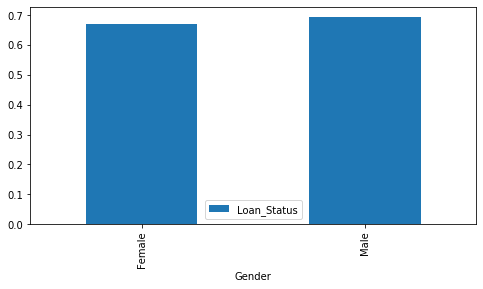

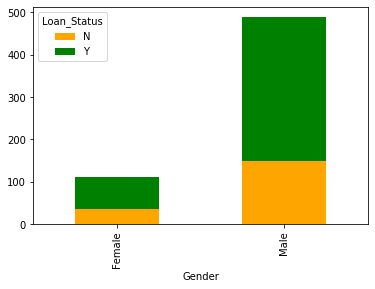

In [22]:
temp4.plot(kind = 'bar', figsize = (8, 4))

temp4 = pd.crosstab(df['Gender'], df['Loan_Status'])
temp4.plot(kind = 'bar', stacked = True, color = ['orange','green'], grid = False)

Looking at the barplot, we can observe that the probability of getting a loan is very similar w.r.t an applicant being a male/female(68%/66%). 

**Married v/s Loan_Status**

In [23]:
temp5 = df['Married'].value_counts(ascending = True)
temp6 = df.pivot_table(values = 'Loan_Status', index = ['Married'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Married column:') 
print (temp5)

print ("\nProbility of getting a loan w.r.t a person's marital status:")
print (temp6)

Frequency Table for Married column:
No     213
Yes    398
Name: Married, dtype: int64

Probility of getting a loan w.r.t a person's marital status:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


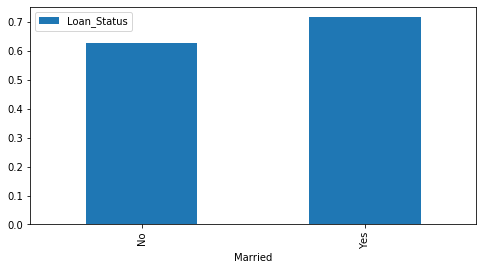

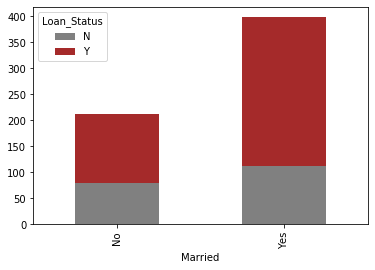

In [24]:
temp6.plot(kind = 'bar', figsize = (8, 4))

temp6 = pd.crosstab(df['Married'], df['Loan_Status'])
temp6.plot(kind = 'bar', stacked = True, color = ['grey','brown'], grid = False)

Looking at the barplot, we can observe that the probability of getting a loan is somewhat higher in case of an applicant being married w.r.t his/her non-married counterpart; this difference being around 9%.

**Dependants v/s Loan_Status**

In [25]:
temp7 = df['Dependents'].value_counts(ascending = True)
temp8 = df.pivot_table(values = 'Loan_Status', index = ['Dependents'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Dependents column:') 
print (temp7)

print ("\nProbility of getting a loan w.r.t no. of dependents of an applicant :")
print (temp8)

Frequency Table for Dependents column:
3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64

Probility of getting a loan w.r.t no. of dependents of an applicant :
            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059


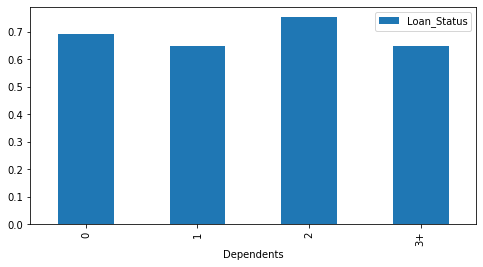

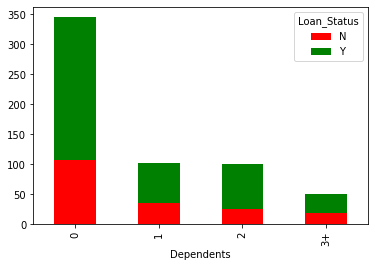

In [26]:
temp8.plot(kind = 'bar', figsize = (8, 4))

temp8 = pd.crosstab(df['Dependents'], df['Loan_Status'])
temp8.plot(kind = 'bar', stacked = True, color = ['red','green'], grid = False)

Looking at the barplot, we can observe that the probability of getting a loan is somewhat different in general w.r.t no of dependants an applicant, with the maximum at around 75% for 2 dependants followed by 0 dependants at 69% approx. Also, it is important to acknowledge that dependants do not mean housewife and kids/children in particular. This may be true for some cases. However,dependants could include retired parents of an applicant as well.

**Education v/s Loan_Status**

In [27]:
temp9 = df['Education'].value_counts(ascending = True)
temp10 = df.pivot_table(values = 'Loan_Status', index = ['Education'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Education column:') 
print (temp9)

print ("\nProbility of getting a loan w.r.t an applicant being a graduate/non-graduate:")
print (temp10)

Frequency Table for Education column:
Not Graduate    134
Graduate        480
Name: Education, dtype: int64

Probility of getting a loan w.r.t an applicant being a graduate/non-graduate:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


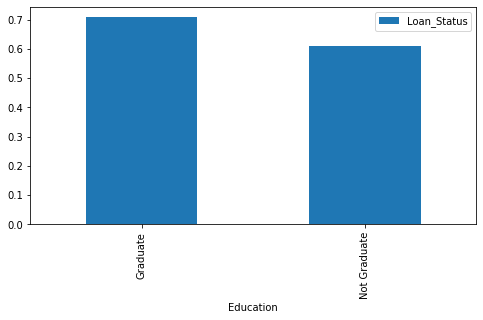

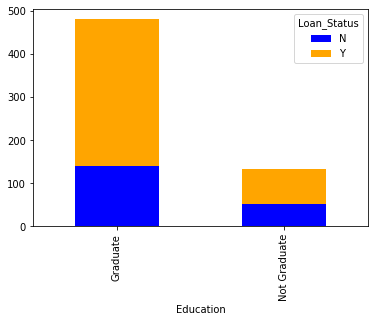

In [28]:
temp10.plot(kind = 'bar', figsize = (8, 4))

temp10 = pd.crosstab(df['Education'], df['Loan_Status'])
temp10.plot(kind = 'bar', stacked = True, color = ['blue','orange'], grid = False)

Looking at the barplot, we can observe that the probability of getting a loan is visibly different w.r.t an applicant being a graduate/non-graduate(70%/61%);higher in case of graduates. This difference in probability is around 9%.

**Self_Employed v/s Loan Status**

In [29]:
temp11 = df['Self_Employed'].value_counts(ascending = True)
temp12 = df.pivot_table(values = 'Loan_Status', index = ['Self_Employed'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Self_Employed column:') 
print (temp11)

print ("\nProbility of getting a loan w.r.t a self-employed/non self-employed applicant:")
print (temp12)

Frequency Table for Self_Employed column:
Yes     82
No     500
Name: Self_Employed, dtype: int64

Probility of getting a loan w.r.t a self-employed/non self-employed applicant:
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


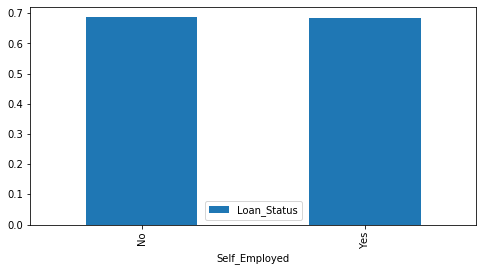

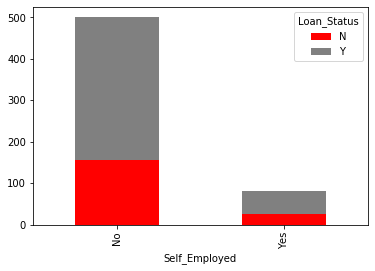

In [30]:
temp12.plot(kind = 'bar', figsize = (8, 4))

temp12 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
temp12.plot(kind = 'bar', stacked = True, color = ['red','grey'], grid = False)

Looking at the barplot, we can observe that the probability of getting a loan is almost the same w.r.t an applicant being self-employed or not(68%/68%).

**Property_Area v/s Loan_status**

In [31]:
temp13 = df['Property_Area'].value_counts(ascending = True)
temp14 = df.pivot_table(values = 'Loan_Status', index = ['Property_Area'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Property_Area column:') 
print (temp13)

print ("\nProbility of getting a loan w.r.t property area of an applicant:")
print (temp14)

Frequency Table for Property_Area column:
Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64

Probility of getting a loan w.r.t property area of an applicant:
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


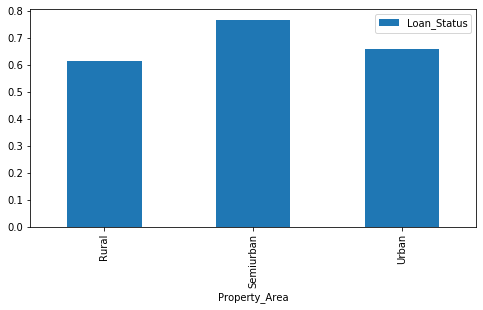

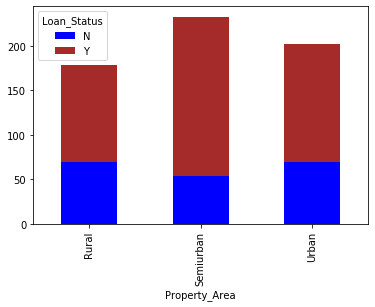

In [32]:
temp14.plot(kind = 'bar', figsize = (8, 4))

temp14 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
temp14.plot(kind = 'bar', stacked = True, color = ['blue','brown'], grid = False)

In contrast to the popular opinion that having a property that is located in an urban area would increase one's chances of getting a loan post applying for the same, the bar plot reveals that the probability is higher in case of semiurban property of an applicant(around 76/77%). This may be due to the fact that semi-urban applicants are more in number. This is followed by Urban(approx. 66%) and Rural(approx. 62%).

## 6. Data Wrangling for further exploration

Now, we will explore ApplicantIncome and LoanStatus variables further and perform perform data wrangling. Here are the problems we are already aware of:

1. There are missing values in some variables. We should estimate those values depending on the amount of missing values and the expected importance of variables.

2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

**Checking missing values in the dataset**

In [33]:
df.apply(lambda x: sum(x.isnull()),axis=0) #To find the no. of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The missing values are not many comparitively, but many variables have them and each of these should be estimated and added in the data. Also, we should check for values which are not practical in nature.

**Filling missing values in LoanAmount**

A key hypothesis is that a combination of educated/self-employed columns can yield a good estimate of loan amount.

First, let’s look at the boxplot to see if a trend exists:

In [34]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) #fill missing values using mean

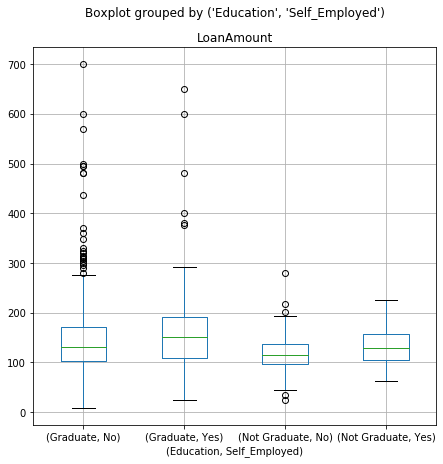

In [35]:
df.boxplot(column = 'LoanAmount', by = ('Education', 'Self_Employed'), figsize = (7,7))

We see some variations in the median of loan amount for each group and this can be used to impute the values. Firstly, we have to ensure that each of Self_Employed and Education variables should not have missing values.

But, Self_Employed has some missing values. Now, we look at the frequency table:

In [36]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since 500 values are “No”, it is safe to impute the missing values as “No” as there may be a high probability of success. This can be achieved as follows:

In [37]:
df['Self_Employed'].fillna('No',inplace=True) #replacing all missing values by 'No'

**Treating extreme values in LoanAmount and ApplicantIncome**

We analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So, instead of treating them as outliers we will apply a log transformation to nullify their effect.

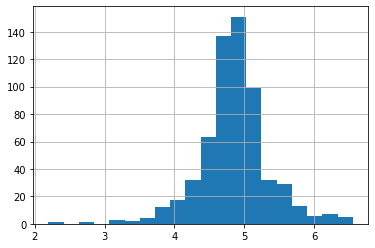

In [38]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) #applying log transformation
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been subsided to a decent extent.

Looking at ApplicantIncome, one intuition can be that some applicants have lower income but strong support from their Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of it.

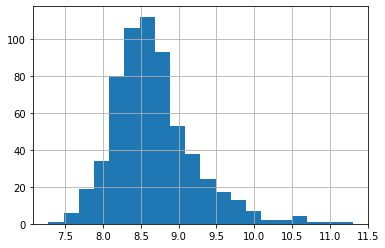

In [39]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

We can observe that the distribution is much better now.

**Imputing the missing values of other columns**

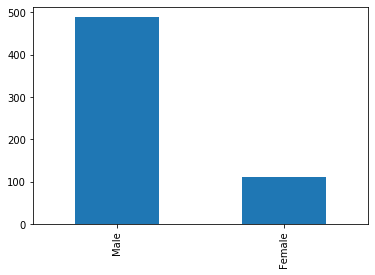

In [40]:
df['Gender'].value_counts()
df['Gender'].fillna((df['Gender'].mode()), inplace = True) #replacing missing values by mode - Male
df['Gender'].value_counts().plot.bar()

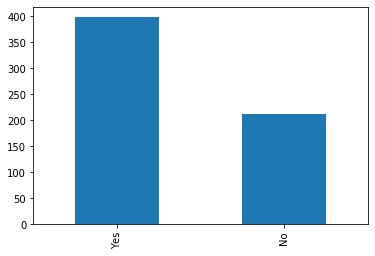

In [41]:
df['Married'].value_counts()
df['Married'].fillna((df['Married'].mode()), inplace = True) #replacing missing values by mode - Yes
df['Married'].value_counts().plot.bar()

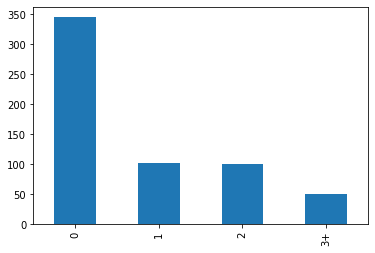

In [42]:
df['Dependents'].value_counts()
df['Dependents'].fillna((df['Dependents'].mode()), inplace = True) #replacing missing values by mode - 0
df['Dependents'].value_counts().plot.bar()

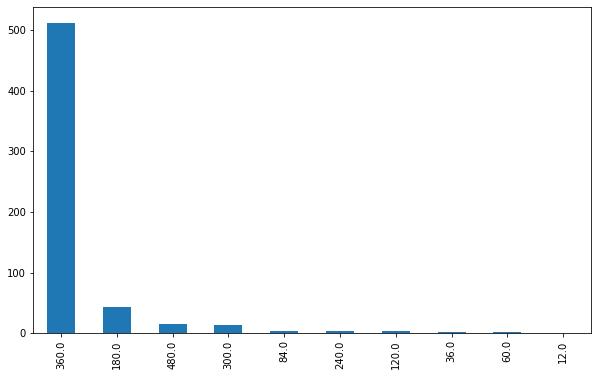

In [43]:
df['Loan_Amount_Term'].value_counts()
df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mode()), inplace = True) #replacing missing values by mode - 360.0 months
df['Loan_Amount_Term'].value_counts().plot.bar(figsize = (10, 6))

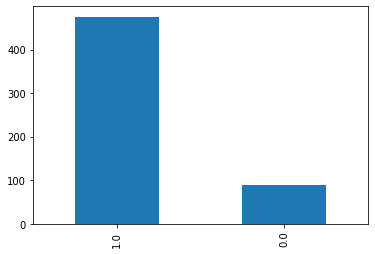

In [44]:
df['Credit_History'].value_counts()
df['Credit_History'].fillna((df['Credit_History'].mode()), inplace = True) #replacing missing values by mode - Y:1
df['Credit_History'].value_counts().plot.bar()

**Possible Additional Info**

1. Creating a column called Financial Capacity = LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

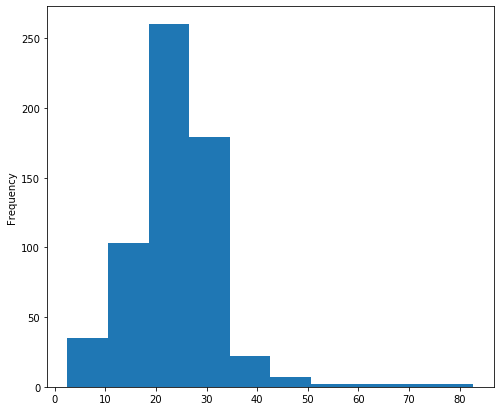

In [45]:
df['Financial_Capacity'] = (df['LoanAmount']*1000)/df['TotalIncome']
df['Financial_Capacity'].plot.hist(figsize = (8, 7))

Looking at the histogram, we can safely deduce that around 15-20 applicants have more than 50% competency to repay their loans. 

2. EMI = Loan Amount / Loan Amount Term

Indeed EMI is not calculated this way. However, the home loan interest rates for several banks on an average would be around 8.5 - 9.5%. Hence, I take the liberty to assume that 9% is the interest rate.

```python
a = p*r*(1+r)^n #p - Loan amount, r - Interest rate per month, n - No. of monthly installments
b = (1+r)^(n-1)
EMI = a/b
```

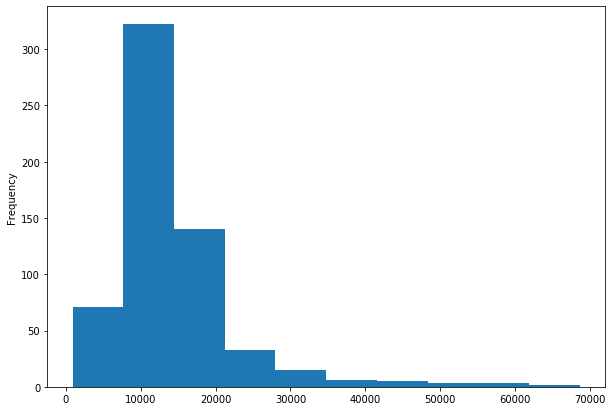

In [46]:
df['EMI'] = ((df['LoanAmount']*1000) * 0.09 * (1.09 ** df['Loan_Amount_Term']))/(1.09 ** (df['Loan_Amount_Term'] - 1))
df['EMI'].plot.hist(figsize = (10, 7))

From this plot, we can deduce that around 350 people are very likely to pay an EMI of 8,000 - 13,000 a month. Of course, the EMI amount depends on the LoanAmount and the Loan_Amount_Term.

## 7. Actionable Insights

1. **Loan amount** that will be sanctioned after the application is processed and approved **depends greatly** on the **credit history** of an applicant.
2. Some applicants, **although** having **lower income** may possess **strong financial support** from their **co-applicants**.
3. The **ratio** of the **loan amount** to the **total income** of an applicant(including income of co-applicants) i.e., the **financial capacity/capability** explains the **probability** of **successful repayment** of the loan by him/her.
4. **EMIs** allow borrowers the peace of mind of knowing exactly **how much money** they will need to **pay** each **month** toward their loan. The **bank/financial institution** can employ the same, **make comparisons** with the **estimated savings** that a loan **applicant** may be able to do **monthly** based on his/her income, and make well **calculated decisions** regarding his/her **ability** to **repay the loan** within/on the stipulated **loan amount term**.  